In [1]:
# https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html

# 1. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
train

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [3]:
test = pd.read_csv("musics.csv")
test

,Unnamed: 0,Unnamed: 0.1,artist_name,track_name,track_id,year,market,track_popularity,artist_id,danceability,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,videoId,now
0,0,0,David Bowie,Starman - 2012 Remaster,0pQskrTITgmCMyr85tb9qq,1972,KR,75,0oSGxfWSnnOXhD2fKuz2Gy,0.486,...,100.456,audio_features,0pQskrTITgmCMyr85tb9qq,spotify:track:0pQskrTITgmCMyr85tb9qq,https://api.spotify.com/v1/tracks/0pQskrTITgmC...,https://api.spotify.com/v1/audio-analysis/0pQs...,254293,4,aBKEt3MhNMM,82014.0
1,1,1,Al Green,Let's Stay Together,63xdwScd1Ai1GigAwQxE8y,1972,KR,74,3dkbV4qihUeMsqN4vBGg93,0.756,...,101.954,audio_features,63xdwScd1Ai1GigAwQxE8y,spotify:track:63xdwScd1Ai1GigAwQxE8y,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,199396,4,COiIC3A0ROM,NaN
2,2,2,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",3gdewACMIVMEWVbyb8O9sY,1972,KR,80,3PhoLpVuITZKcymswpck5b,0.601,...,136.571,audio_features,3gdewACMIVMEWVbyb8O9sY,spotify:track:3gdewACMIVMEWVbyb8O9sY,https://api.spotify.com/v1/tracks/3gdewACMIVME...,https://api.spotify.com/v1/audio-analysis/3gde...,281613,4,DtVBCG6ThDk,NaN
3,3,3,Deep Purple,Smoke On The Water - Remastered 2012,5MMnwYs0hIxkENRsbkWJ2G,1972,KR,73,568ZhdwyaiCyOGJRtNYhWf,0.598,...,114.169,audio_features,5MMnwYs0hIxkENRsbkWJ2G,spotify:track:5MMnwYs0hIxkENRsbkWJ2G,https://api.spotify.com/v1/tracks/5MMnwYs0hIxk...,https://api.spotify.com/v1/audio-analysis/5MMn...,340742,4,kjO4UISSkKU,NaN
4,4,4,Carpenters,Top Of The World,1Ehdm1PDlKrdfyBsjwEvd1,1972,KR,67,1eEfMU2AhEo7XnKgL7c304,0.379,...,184.301,audio_features,1Ehdm1PDlKrdfyBsjwEvd1,spotify:track:1Ehdm1PDlKrdfyBsjwEvd1,https://api.spotify.com/v1/tracks/1Ehdm1PDlKrd...,https://api.spotify.com/v1/audio-analysis/1Ehd...,179173,4,3hyFB6SA7b4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82010,82010,82010,Maluma,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022,GL,82,1r4hJ1h58CWwUQe3MxPuau,0.822,...,82.01,audio_features,3SlKme42qm1vWrkl3BrZmm,spotify:track:3SlKme42qm1vWrkl3BrZmm,https://api.spotify.com/v1/tracks/3SlKme42qm1v...,https://api.spotify.com/v1/audio-analysis/3SlK...,225366,4,WcOJ2mRlg4Y,NaN
82011,82011,82011,ITZY,SNEAKERS,2WoluqyWzsgRmFCeHeGlnm,2022,GL,79,2KC9Qb60EaY0kW4eH68vr3,0.935,...,119.986,audio_features,2WoluqyWzsgRmFCeHeGlnm,spotify:track:2WoluqyWzsgRmFCeHeGlnm,https://api.spotify.com/v1/tracks/2WoluqyWzsgR...,https://api.spotify.com/v1/audio-analysis/2Wol...,179453,4,Hbb5GPxXF1w,NaN
82012,82012,82012,42 Dugg,IDGAF,3umPlMokEzAFxJO33tNdlY,2022,GL,69,45gHcnDnMC15sgx3VL7ROG,0.514,...,108.666,audio_features,3umPlMokEzAFxJO33tNdlY,spotify:track:3umPlMokEzAFxJO33tNdlY,https://api.spotify.com/v1/tracks/3umPlMokEzAF...,https://api.spotify.com/v1/audio-analysis/3umP...,138673,5,liLOvA-FGQM,NaN
82013,82013,82013,NLE Choppa,Slut Me Out,5BmB3OaQyYXCqRyN8iR2Yi,2022,GL,70,0ErzCpIMyLcjPiwT4elrtZ,0.938,...,121.108,audio_features,5BmB3OaQyYXCqRyN8iR2Yi,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,https://api.spotify.com/v1/tracks/5BmB3OaQyYXC...,https://api.spotify.com/v1/audio-analysis/5BmB...,123673,4,iss7pgQbQmo,NaN


In [50]:
train.columns

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [4]:
train = pd.DataFrame(train, columns = ['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'])

train

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  time_signature    686 non-null    int64  
 11  mood              686 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 64.4+ KB


In [6]:
train['mood'] = train['mood'].astype('category').cat.codes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  time_signature    686 non-null    int64  
 11  mood              686 non-null    int8   
dtypes: float64(9), int64(2), int8(1)
memory usage: 59.7 KB


In [55]:
train

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,2
1,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,3
2,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,3
3,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,2
4,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,0
682,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,3
683,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,3
684,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,3


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  time_signature    686 non-null    int64  
 11  mood              686 non-null    int8   
dtypes: float64(9), int64(2), int8(1)
memory usage: 59.7 KB


In [7]:
train.describe()

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262,1.494169
std,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297,1.181040
min,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000,0.000000
25%,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000,0.000000
50%,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000,1.000000
75%,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000,3.000000
max,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000,3.000000


In [8]:
train['mood'].value_counts()

3    197
0    195
1    154
2    140
Name: mood, dtype: int64

In [15]:
import sys

print(sys.version)

3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]


In [16]:
import platform
print(platform.python_version())

3.7.0


 ## 시각화

In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

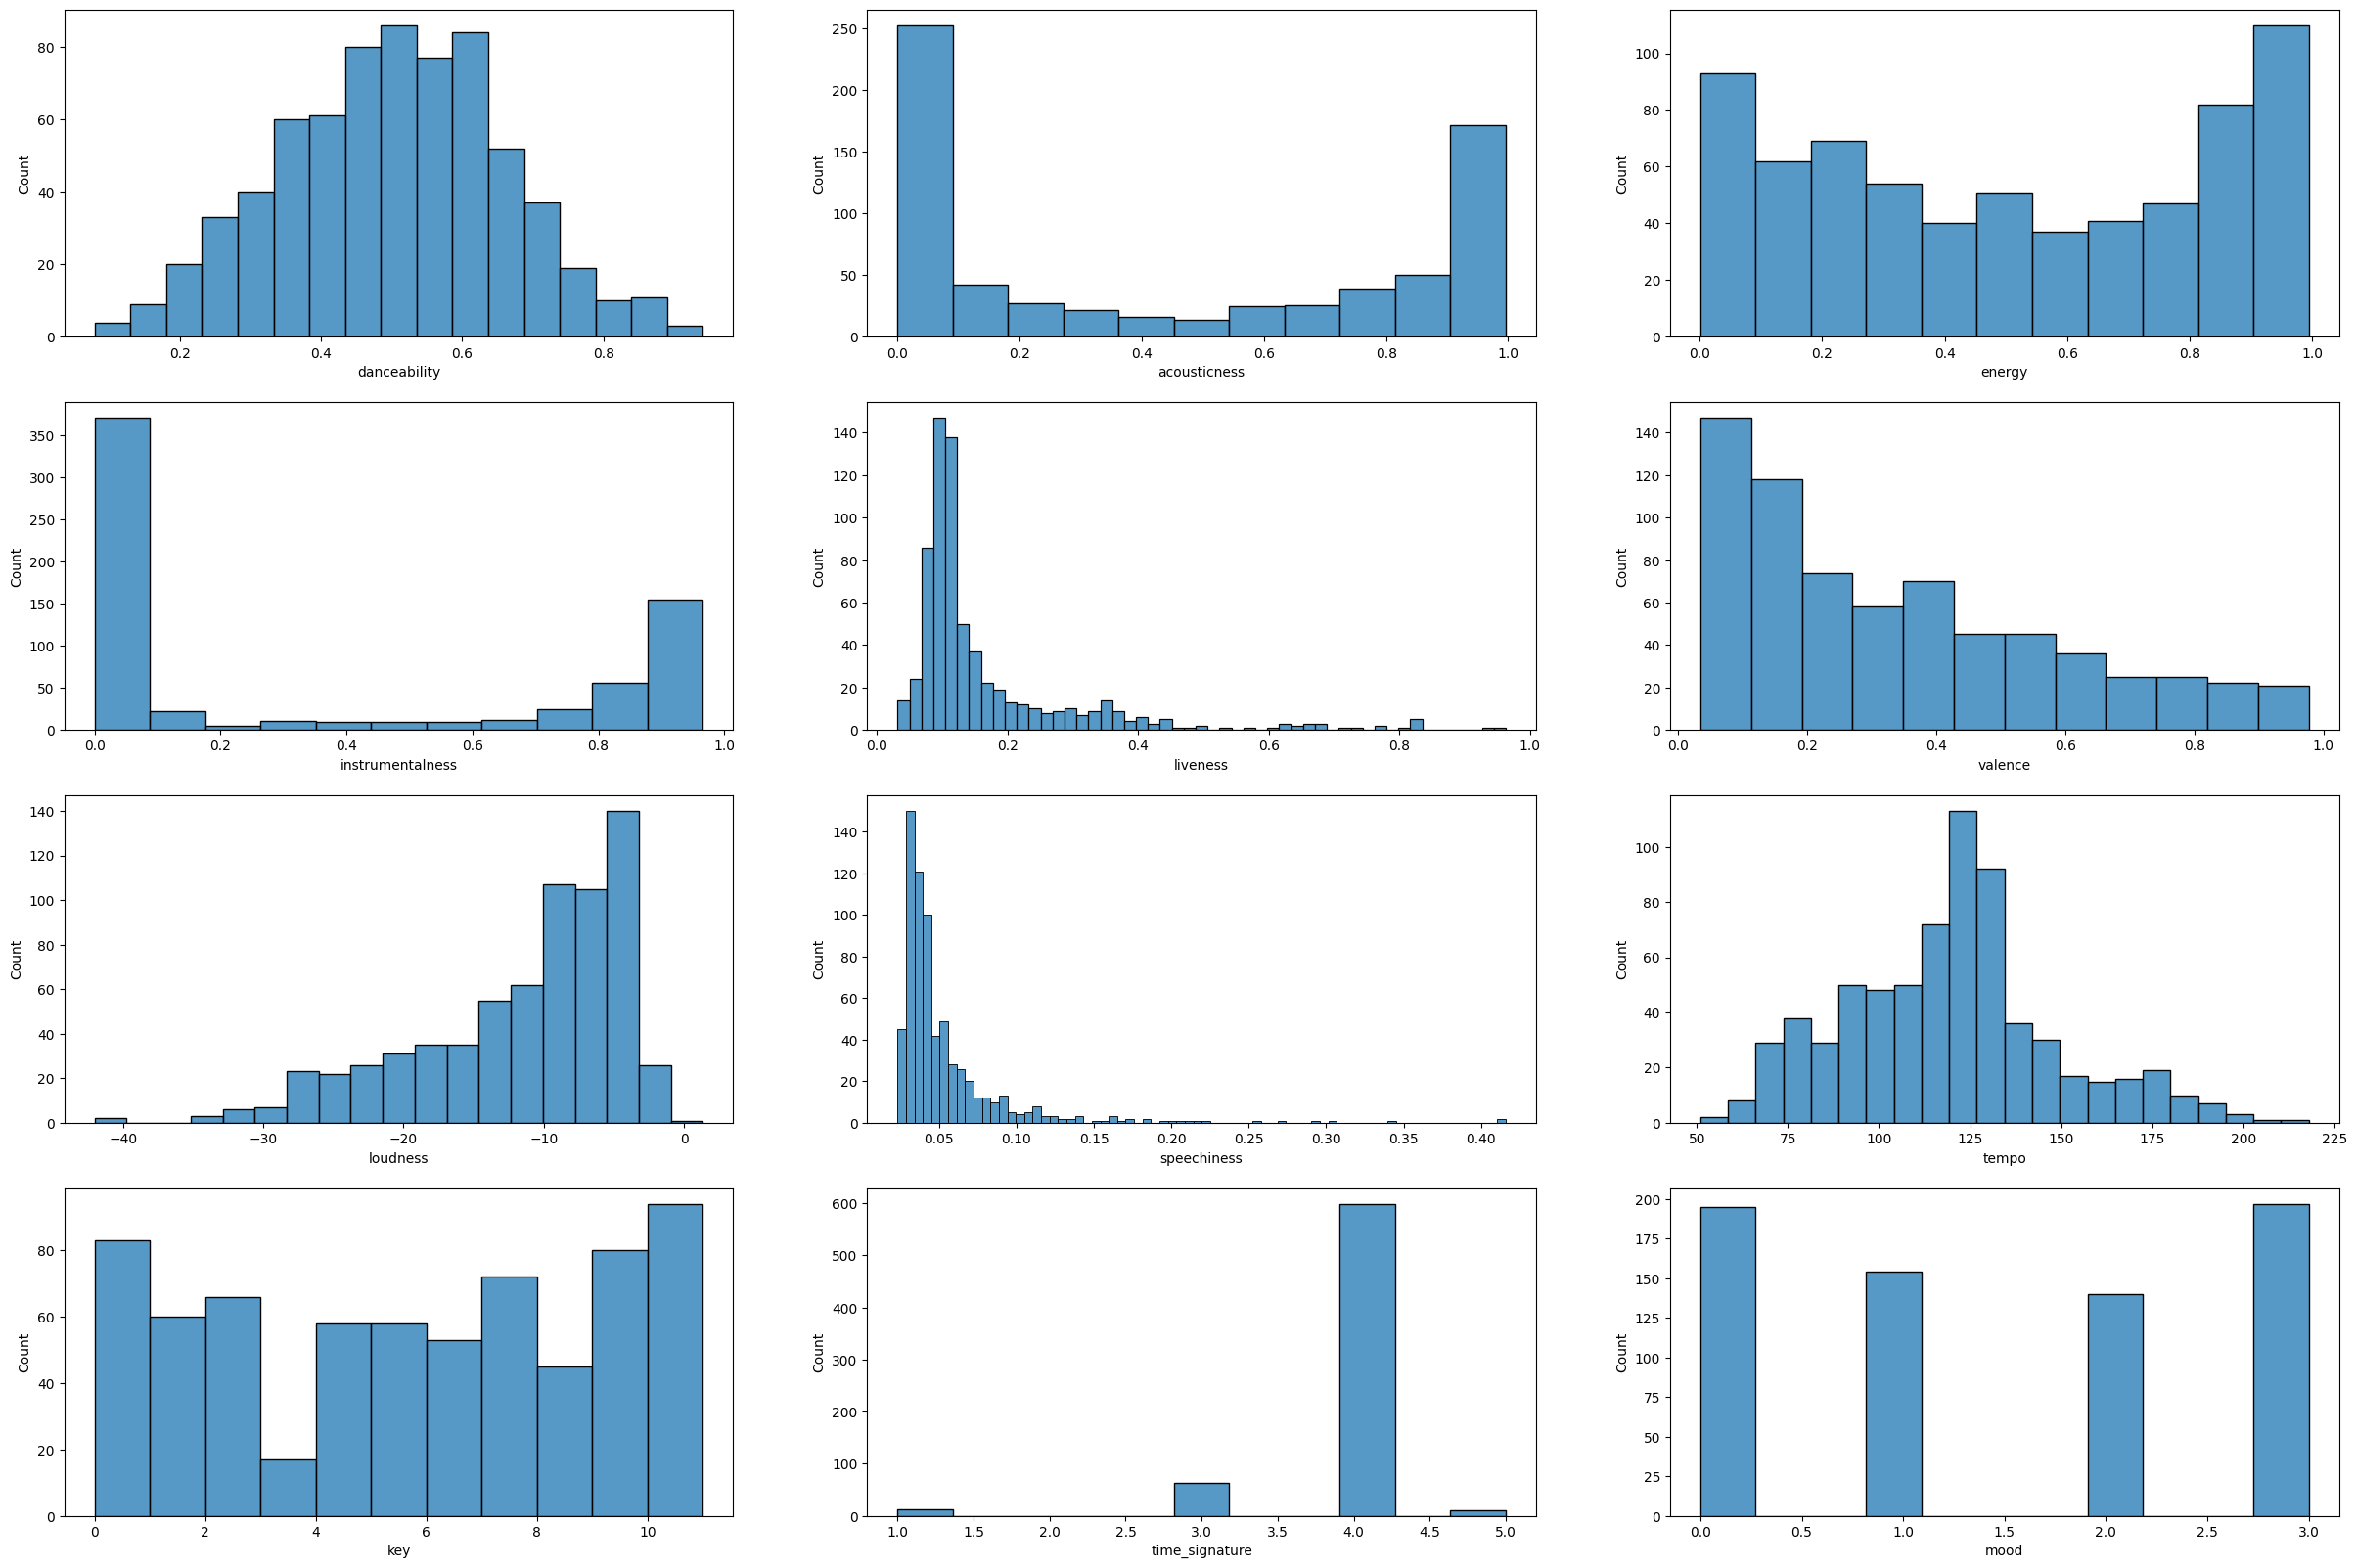

In [10]:
f, ax = plt.subplots(4,3, figsize=(30,20))
ax = ax.flatten()
col_list = list(train.columns)
for i in range(len(col_list)):
  sns.histplot(data=train, x= col_list[i],ax=ax[i])
plt.show()

<AxesSubplot:>

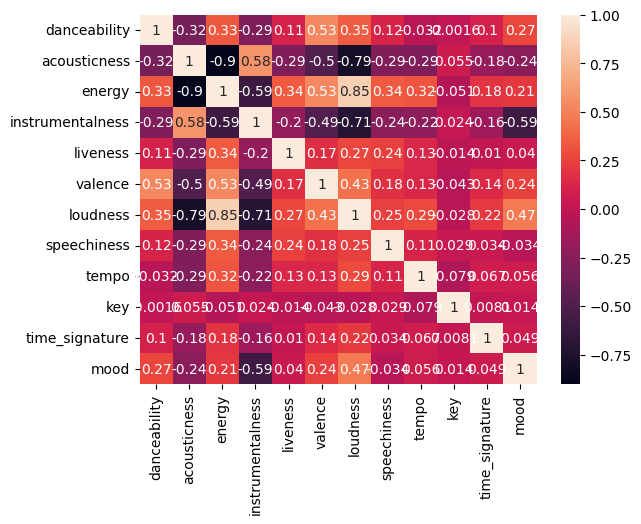

In [19]:
sns.heatmap(train.corr(), annot = True)

array([<AxesSubplot:title={'center':'key'}, xlabel='[mood]'>,
       <AxesSubplot:title={'center':'time_signature'}, xlabel='[mood]'>],
      dtype=object)

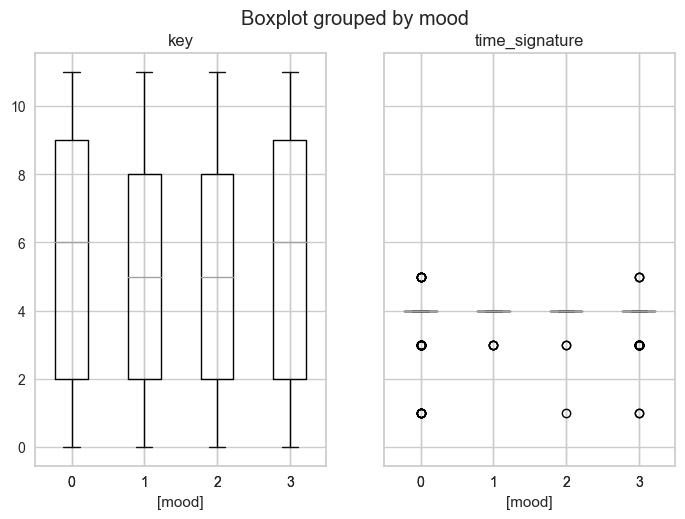

In [61]:
train[['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood']].boxplot(by='mood')

In [57]:
train.columns

Index(['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

## 모델링

In [38]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.1/7.1 MB 35.0 MB/s eta 0:00:00
     --------------------------------------- 34.1/34.1 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 307.0/307.0 kB ? eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = train[train.columns[0:11]]
y = train[['mood']]
print(X.shape)
print(y.shape)

(686, 11)
(686, 1)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42,test_size = 0.3)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(480, 11)
(480, 1)
(206, 11)
(206, 1)


In [24]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
ss.fit(X_train)
ss_train = ss.transform(X_train)
ss_test = ss.transform(X_test)

## 나이브 베이즈

In [31]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(ss_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
pred_y_train = bayes.predict(ss_train)
pred_y_test = bayes.predict(ss_test)

print("model score train : ",bayes.score(ss_train, y_train))
print("model score test : ",bayes.score(ss_test, y_test))

model score train :  0.8041666666666667
model score test :  0.7912621359223301


## 랜덤포레스트

In [29]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(ss_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
pred_y_train = random.predict(ss_train)
pred_y_test = random.predict(ss_test)

print("model score train : ",random.score(ss_train, y_train))
print("model score test : ",random.score(ss_test, y_test))

model score train :  1.0
model score test :  0.8058252427184466


## 서포트 백터 머신

## Pycaret

In [4]:
!pip install pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\multicampus\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~umpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached wordcloud-1.8.2.2-cp37-cp37m-win_amd64.whl (152 kB)
  Using cached numba-0.54.1-cp37-cp37m-win_amd64.whl (2.3 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached pyod-1.0.4.tar.gz (134 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached mlflow-1.28.0-py3-none-any.whl (17.0 MB)
  Using cached pandas_profiling-3.3.0-py2.py3-none-any.whl (268 kB)
  Using cached spacy-2.3.7-cp37-cp37m-win_amd64.whl (9.6 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached PyYAML-5.4.1-cp37-cp37m-win_amd64.whl (210 kB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached gensim-3.8.3-cp37-cp37m-win_amd64.whl (24.2 MB)
  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished w

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  time_signature    686 non-null    int64  
 11  mood              686 non-null    int8   
dtypes: float64(9), int64(2), int8(1)
memory usage: 59.7 KB


In [66]:
train_df = pd.DataFrame(train, columns = ['danceability', 
                                       'acousticness', 
                                       'energy', 
                                       'instrumentalness',       
                                       'liveness', 
                                       'valence', 
                                       'loudness', 
                                       'speechiness', 
                                       'tempo', 
                                       'key',                                      
                                       'time_signature', 
                                       'mood'])

In [35]:
from pycaret.classification import *

df = setup(data = train, target = 'mood', train_size=0.8, session_id = 1115)

,Description,Value
0,session_id,1115
1,Target,mood
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(686, 12)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8137,0.9582,0.7996,0.8220,0.8109,0.7498,0.7541,0.1470
gbc,Gradient Boosting Classifier,0.7973,0.9540,0.7818,0.8075,0.7947,0.7276,0.7320,0.2260
et,Extra Trees Classifier,0.7973,0.9563,0.7801,0.8033,0.7943,0.7277,0.7312,0.1420
lightgbm,Light Gradient Boosting Machine,0.7955,0.9541,0.7781,0.8004,0.7927,0.7251,0.7283,0.0900
lda,Linear Discriminant Analysis,0.7754,0.9456,0.7579,0.7830,0.7745,0.6987,0.7018,0.0100
lr,Logistic Regression,0.7683,0.9466,0.7490,0.7737,0.7641,0.6885,0.6927,0.1390
ridge,Ridge Classifier,0.7317,0.0000,0.7137,0.7484,0.7204,0.6388,0.6489,0.0100
dt,Decision Tree Classifier,0.7044,0.8048,0.6804,0.7038,0.6987,0.6022,0.6053,0.0100
ada,Ada Boost Classifier,0.6606,0.8705,0.6444,0.6872,0.6590,0.5452,0.5534,0.0430
nb,Naive Bayes,0.6277,0.8864,0.6287,0.7156,0.6295,0.5094,0.5359,0.0100


## Random Forest Classifier

In [37]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

NameError: name 'RandomForestRegressor' is not defined